In [1]:
import sdevelo as sv
import scvelo as scv

(Working on SDEvelo 0.2.12)
2025-01-11 14:57:16


/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing 

In [2]:
simulation = sv.SimData(n_vars=2000)
adata = simulation.generate()

In [4]:
args = sv.Config()

args.cuda_device = -1

model = sv.SDENN(args, adata)
adata = model.train(100)

cuda
Extracted 2000 highly variable genes.
Logarithmized X.
Using scVelo version 0.3.3


/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
2025-01-11 14:58:01.685478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736607481.696751   14848 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736607481.700148   14848 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
2000
Epoch: 0, Loss: 0.753, alpha: 1.52, beta: 4.46, gamma: 0.64, s1: 0.010, s2: 0.010,  t_m: 0.881,  u_shift: -0.007,  s_shift: 0.002
Epoch: 50, Loss: 0.512, alpha: 3.92, beta: 8.39, gamma: 5.73, s1: 0.013, s2: 0.010,  t_m: 0.824,  u_shift: 0.100,  s_shift: 0.050


computing velocity graph (using 6/6 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing 

    finished (0:00:04) --> added 
    'sde_velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'sde_velocity_length' (adata.obs)
--> added 'sde_velocity_confidence' (adata.obs)
--> added 'sde_velocity_confidence_transition' (adata.obs)
computing velocity embedding
    finished (0:00:00) --> added
    'sde_velocity_pca', embedded velocity vectors (adata.obsm)


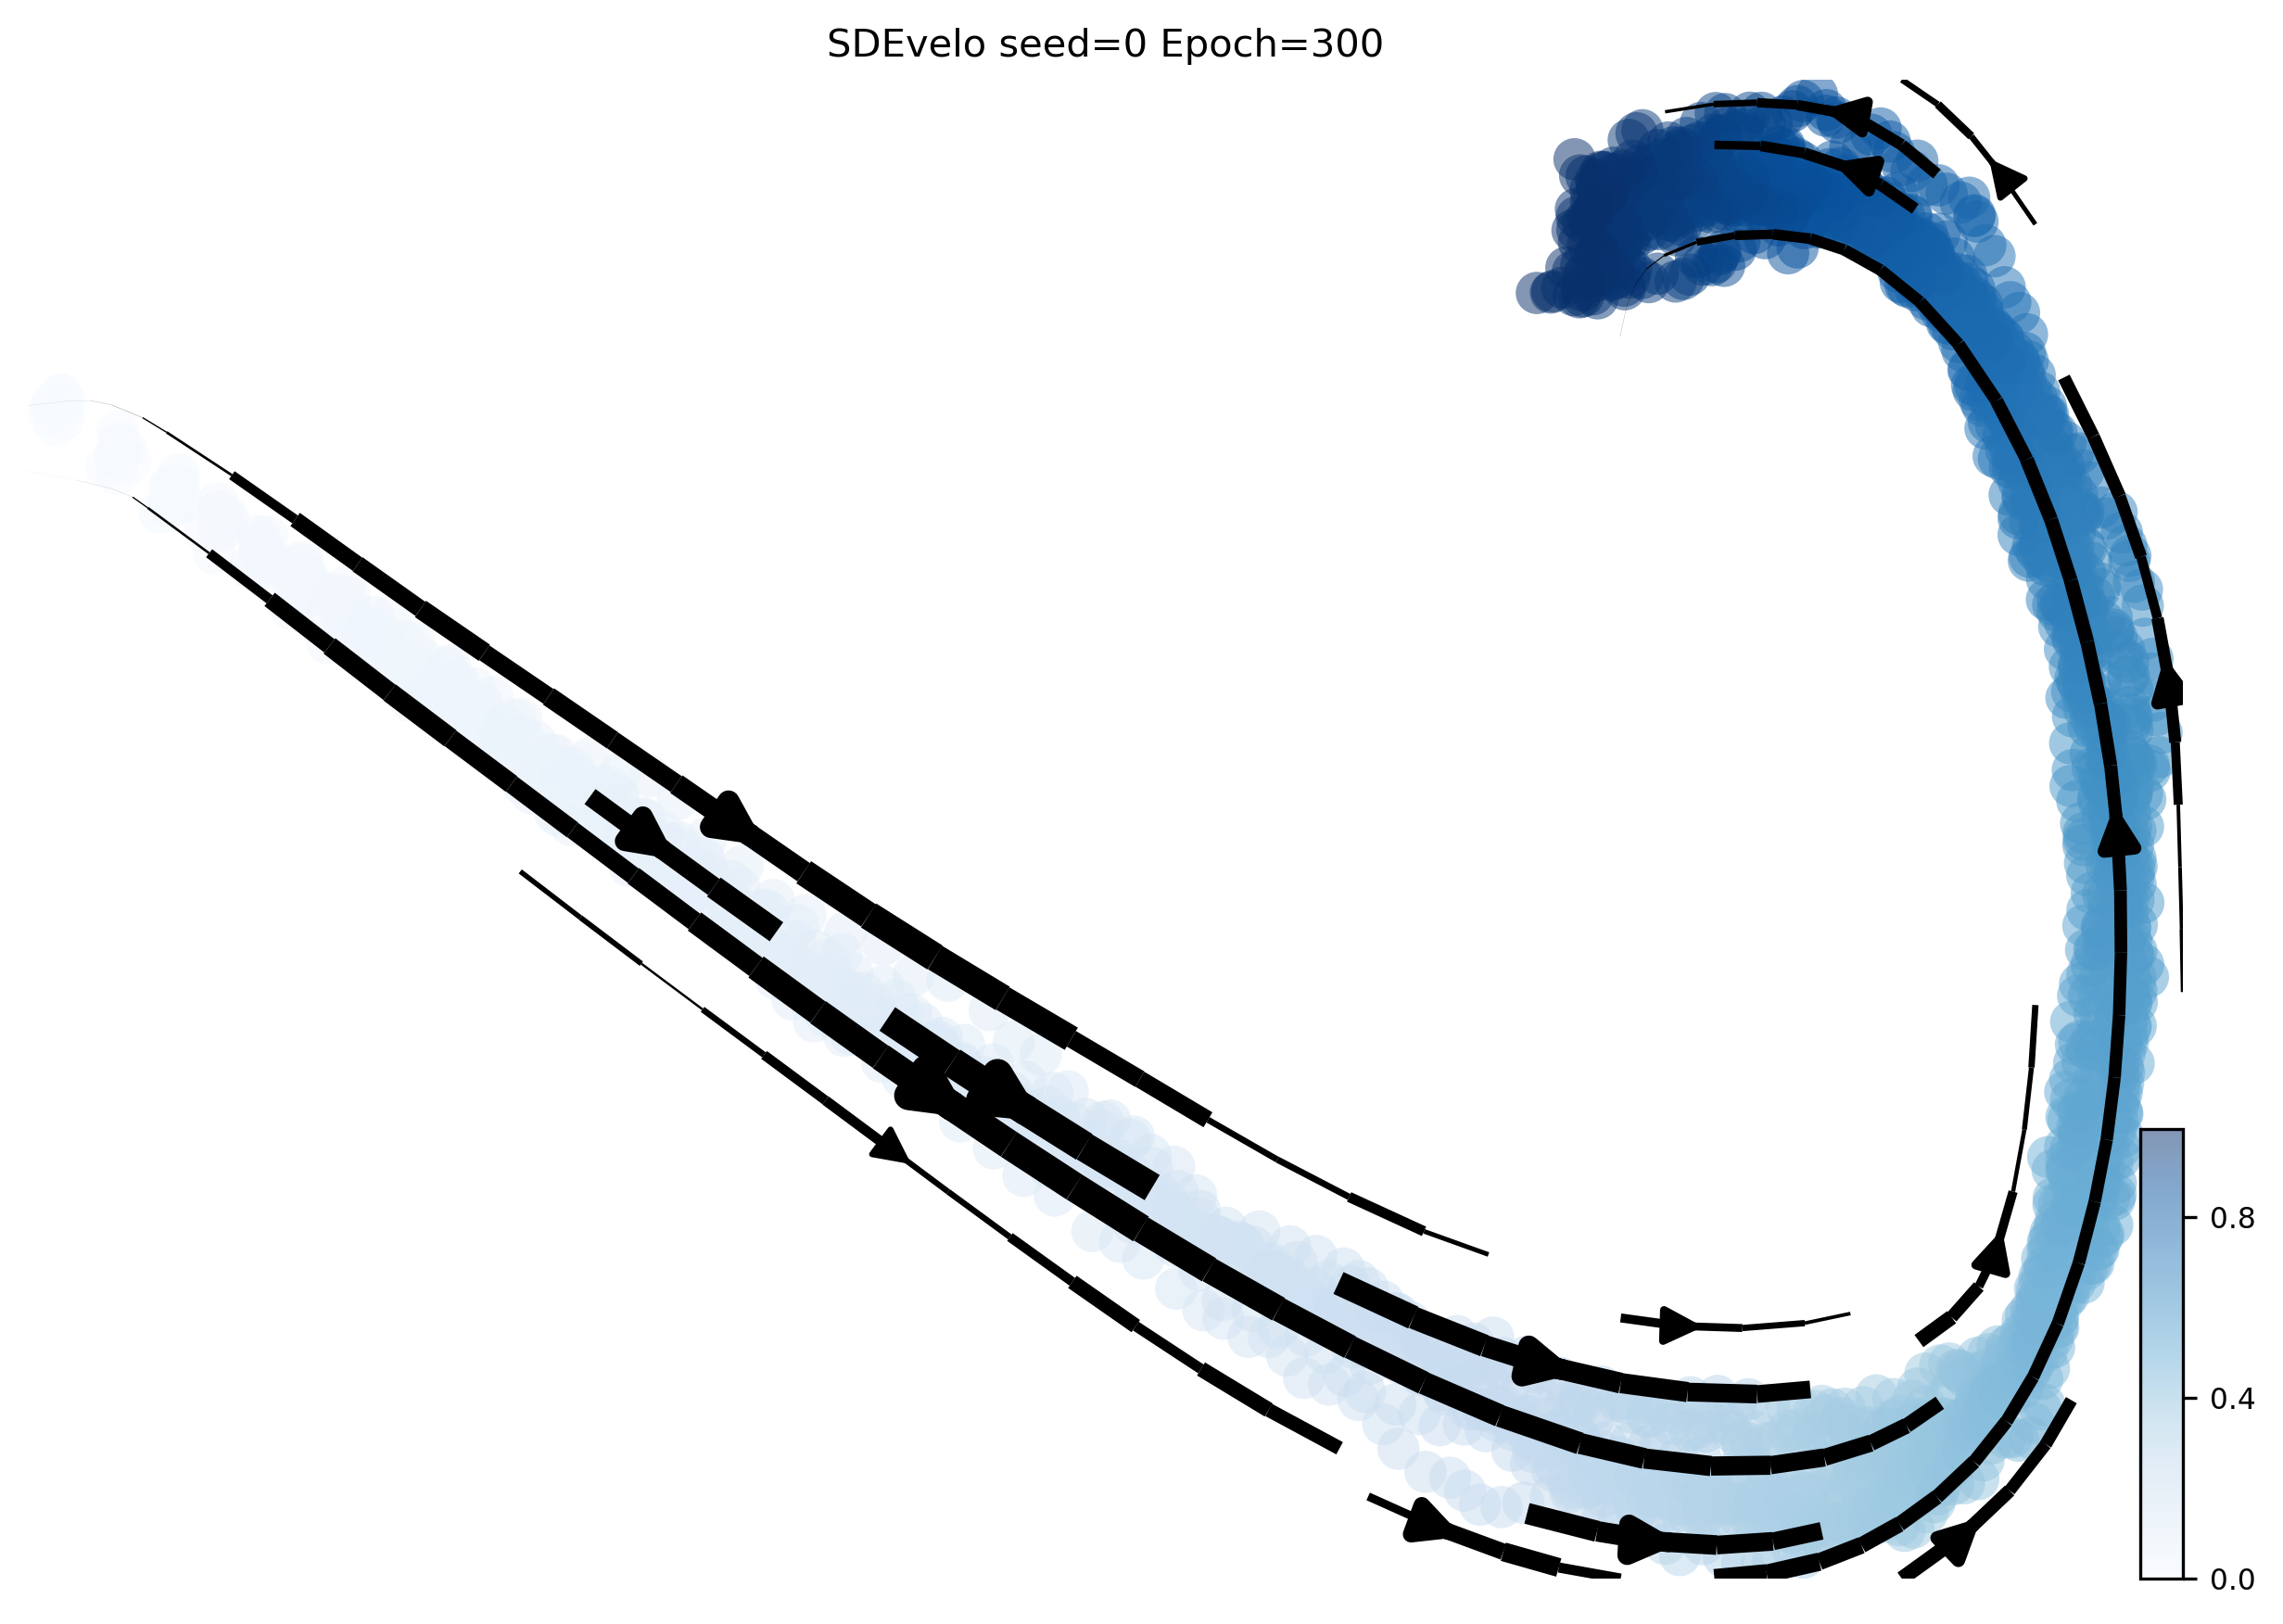

In [5]:
args.vis_type_col = 'true_t'
kwargs = dict(fontsize=10, density=0.8, arrow_size=2, linewidth=4, cmap='Blues', alpha=0.5)
sv.plot_streamline(adata, args, **kwargs)

In [6]:
adata.write_h5ad("./sdvelo_sde_sim.h5ad")

In [7]:
adata

AnnData object with n_obs × n_vars = 2000 × 2000
    obs: 'true_t', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'latent_time', 'sde_velocity_self_transition', 'sde_velocity_length', 'sde_velocity_confidence', 'sde_velocity_confidence_transition'
    var: 'true_t_', 'true_alpha', 'true_beta', 'true_gamma', 'true_sigma_1', 'true_sigma_2', 'true_u0', 'true_s0', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_sigma_1', 'fit_sigma_2'
    uns: 'log1p', 'pca', 'neighbors', 'sde_velocity_graph', 'sde_velocity_graph_neg', 'sde_velocity_params'
    obsm: 'X_pca', 'sde_velocity_pca'
    varm: 'PCs'
    layers: 'unspliced', 'spliced', 'Ms', 'Mu', 'sde_velocity', 'pred_u', 'pred_s'
    obsp: 'distances', 'connectivities'